# 🔊**Audio MNIST Digit Recognition**

## **I. Overview**

### **i. Context**

Over the past few decades, significant advances have been made in the field of audio recognition, with extensive research worldwide focused on leveraging deep learning for speech and sound analysis. A common approach in this domain is the conversion between audio signals and spectrograms.

Raw audio is represented as a waveform, which requires storing a large array of amplitude values—even for short clips. The size of this data depends on the sampling rate, but even at lower rates, the resulting arrays are highly voluminous and computationally expensive to process.

A more efficient alternative is to use spectrograms, which provide a compact visual representation of audio. Spectrograms are generated through Fourier or Short-Time Fourier Transforms (STFT) applied to sound waves. Among various types, Mel-Frequency Cepstral Coefficients (MFCC) spectrograms are particularly common.

In simple terms, a spectrogram visualizes sound by mapping time on the X-axis and frequency (or Mel coefficients) on the Y-axis, with color intensity representing amplitude. Because spectrograms are continuous two-dimensional representations, they can be processed similarly to images, making them well-suited for deep learning models.Over the past few decades, significant advances have been made in the field of audio recognition, with extensive research worldwide focused on leveraging deep learning for speech and sound analysis. A common approach in this domain is the conversion between audio signals and spectrograms.

Raw audio is represented as a waveform, which requires storing a large array of amplitude values—even for short clips. The size of this data depends on the sampling rate, but even at lower rates, the resulting arrays are highly voluminous and computationally expensive to process.

A more efficient alternative is to use spectrograms, which provide a compact visual representation of audio. Spectrograms are generated through Fourier or Short-Time Fourier Transforms (STFT) applied to sound waves. Among various types, Mel-Frequency Cepstral Coefficients (MFCC) spectrograms are particularly common.

In simple terms, a spectrogram visualizes sound by mapping time on the X-axis and frequency (or Mel coefficients) on the Y-axis, with color intensity representing amplitude. Because spectrograms are continuous two-dimensional representations, they can be processed similarly to images, making them well-suited for deep learning models.

### **ii. Objective**

The objective of this project is to build an Artificial Neural Network (ANN) capable of analyzing Mel or MFCC spectrograms of audio files and classifying them into 10 distinct classes. Each audio sample represents a recording of a speaker uttering a digit between 0 and 9, and the model’s task is to predict the corresponding digit based on the input spectrogram.

### **iii. Dataset**

The dataset used in this project is the AudioMNIST dataset, which contains audio files in the .wav format organized into 10 folders. Each folder corresponds to recordings of digits spoken by a specific speaker, allowing for both digit and speaker-level analysis.

### **iv. Libraries**

In [1]:
# ----- II. Preparation -----
# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Audio
# Progress Visualization
from tqdm import tqdm
# Data manipulation
import numpy as np
# Audio Preprocessing
import librosa
import librosa.display as dsp
# File operation
import os
# Data operation
import pandas as pd
# Train test split
from sklearn.model_selection import train_test_split

# ----- III. Modelling -----
# ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model
# Checkpoint and save the best model
from tensorflow.keras.callbacks import ModelCheckpoint
# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer

2025-11-04 17:37:05.349085: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## **II. Prepartion**

### **i. Audio Sampling**

In [2]:
# Set plot theme.
sns.set_style("dark")

In [3]:
def get_audio(digit = 0):
    """
    Randomly selects and plays an audio sample of a spoken digit from the dataset.

    The function randomly chooses a speaker (sample directory) and an audio index,
    loads the corresponding `.wav` file for the specified digit, visualizes its waveform,
    and returns an interactive audio widget for playback.

    Parameters
    ----------
    digit : int, optional
        The digit (0–9) to retrieve the audio sample for. Default is 0.

    Returns
    -------
    IPython.lib.display.Audio
        An interactive audio widget that plays the selected audio sample.

    """

    # Randomly select audio sample directory.
    sample = np.random.randint(1, 10)
    # Randomly select the index of audio.
    index = np.random.randint(1, 5)
    # Modify file location.
    if sample < 10:
        file = f"data/0{sample}/{digit}_0{sample}_{index}.wav"
    else:
        file = f"data/{sample}/{digit}_{sample}_{index}.wav"
    # Get Audio from the selected location.
    data, sample_rate = librosa.load(file)
    # Plot the audio wave.
    dsp.waveshow(data, sr = sample_rate)
    # Show the plot.
    plt.show()
    # Show the widget

    return Audio(data = data, rate = sample_rate)

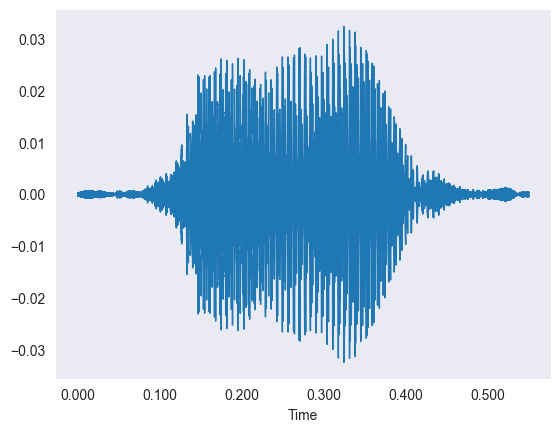

In [4]:
# Show the audio and plot of digit 0
get_audio(0)

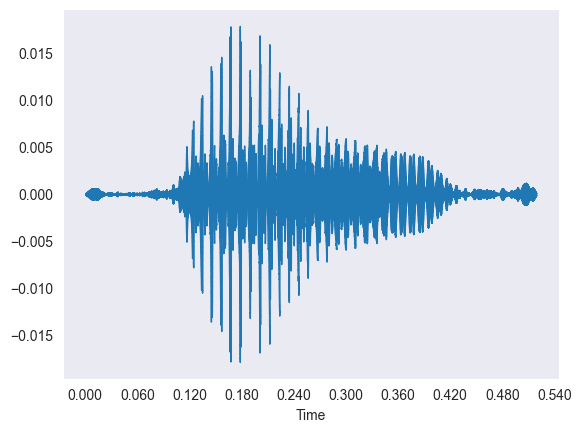

In [5]:
# Show the audio and plot of digit 1
get_audio(1)

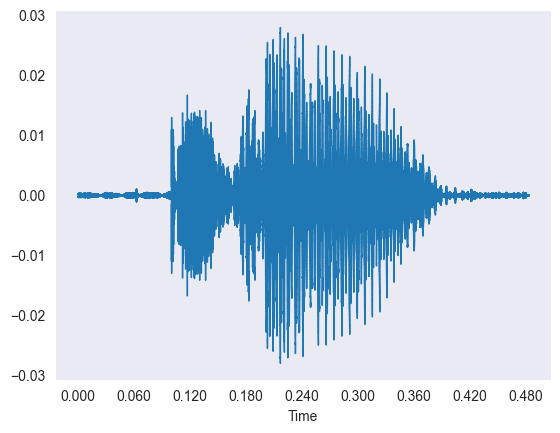

In [6]:
# Show the audio and plot of digit 2
get_audio(2)

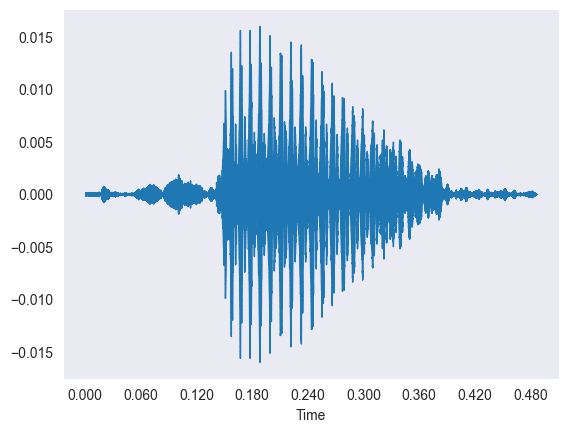

In [7]:
# Show the audio and plot of digit 3
get_audio(3)

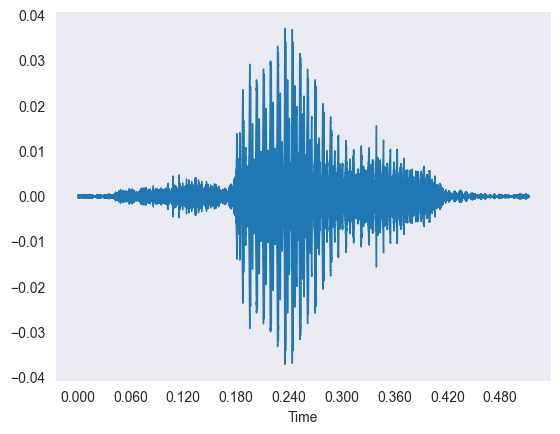

In [8]:
# Show the audio and plot of digit 4
get_audio(4)

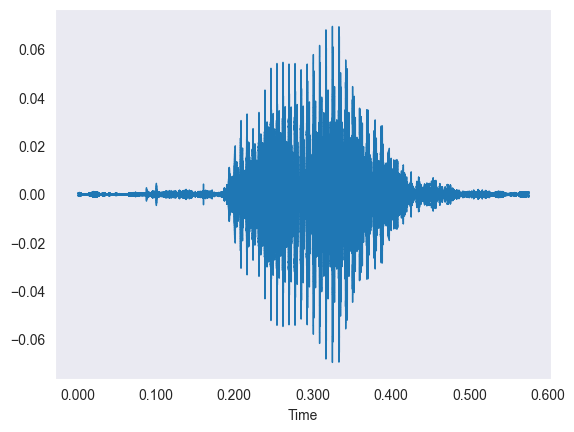

In [9]:
# Show the audio and plot of digit 5
get_audio(5)

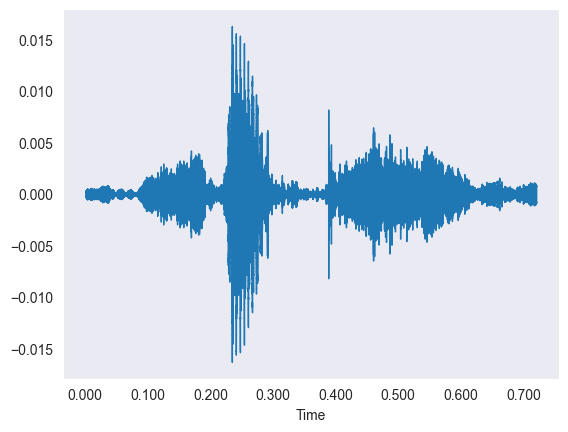

In [10]:
# Show the audio and plot of digit 6
get_audio(6)

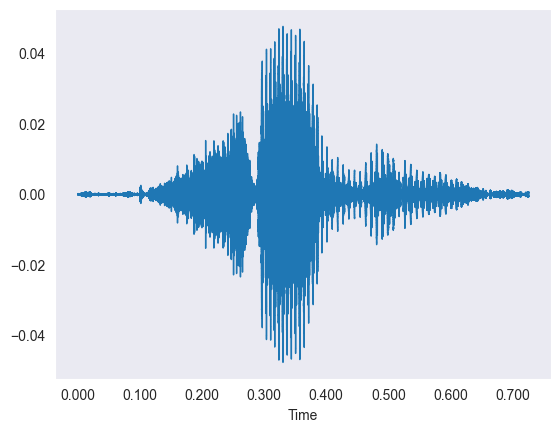

In [11]:
# Show the audio and plot of digit 7
get_audio(7)

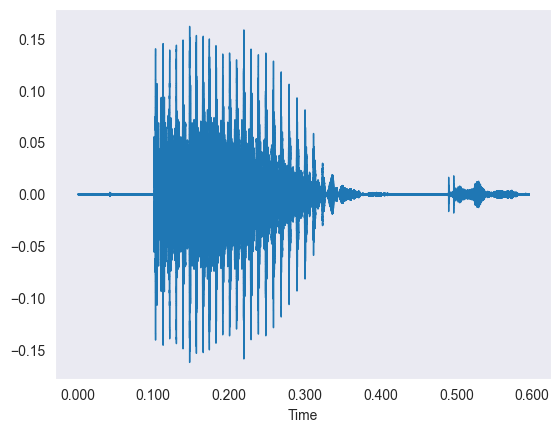

In [12]:
# Show the audio and plot of digit 8
get_audio(8)

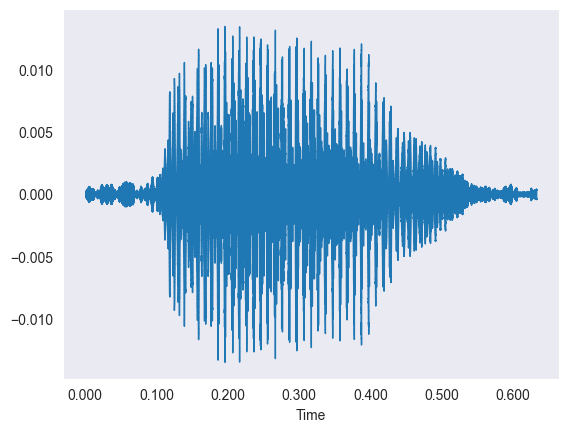

In [13]:
# Show the audio and plot of digit 9
get_audio(9)

**🔬 Observations:** 

 **Waveform Characteristics:**  
  - **Duration:** ~ 0.6 second 
  - **Amplitude Pattern:** peaks appears in the middle of the audio file  
  - **Noise Level:** low

- **Audio Playback:**  
  - **Speech Clarity:** between clear and muffled
  - **Speaker Characteristics:** male 
  - **Pronunciation of Digit:** overall the pronouciation is recognizable

- **Visual Plot Interpretation:**  
  The waveform appears to be segmented. Multisyllable words have different levels of amplitude.

- **Other Notable Observations:**  
  The audio is scilence in the beginning.

---

**⚠️ Key Takeaways**

Summarize what the function achieved and insights gained.  
(e.g., “The function successfully loaded and displayed a random audio file of digit 3, producing a clear waveform and audible pronunciation.”)

### **ii. Visualization of Spectrogram Using the Audio Data**

In [14]:
def get_audio_raw(digit = 0):
    """
    Randomly selects and loads a raw audio sample of a spoken digit from the dataset.

    The function randomly chooses a speaker directory and an audio index, constructs
    the file path for the specified digit, and loads the corresponding `.wav` file
    using Librosa. It returns the raw audio waveform data and its sampling rate for
    further processing or analysis.

    Parameters
    ----------
    digit : int, optional
        The digit (0–9) to retrieve the audio sample for. Default is 0.

    Returns
    -------
    data : numpy.ndarray
        The audio time series representing amplitude values of the waveform.
    sample_rate : int
        The sampling rate (in Hz) at which the audio was originally recorded.

    """

    # Randomly select audio sample directory.
    sample = np.random.randint(1, 10)
    # Randomly select the index of audio.
    index = np.random.randint(1, 5)
    # Modify file location.
    if sample < 10:
        file = f"data/0{sample}/{digit}_0{sample}_{index}.wav"
    else:
        file = f"data/{sample}/{digit}_{sample}_{index}.wav"
    # Get Audio from the selected location.
    data, sample_rate = librosa.load(file)

    # Return audio.
    return data, sample_rate

### **iii. Mel-frequency cepstral coefficients (MFCCs) Feature Extraction**

In [15]:
def extract_features(file):
    """
    Extracts meaningful audio features (MFCCs) from a given sound file.

    This function loads an audio file, computes its Mel-Frequency Cepstral Coefficients (MFCCs),
    averages them over time to create a fixed-length feature vector, and returns the result
    as a NumPy array. These features are widely used in audio classification and speech
    recognition tasks.

    Parameters
    ----------
    file : str
        Path to the audio file (.wav) from which features are to be extracted.

    Returns
    -------
    extracted_features : numpy.ndarray
        A 1D NumPy array representing the averaged MFCC feature vector (length = 40).
    """

    # Load audio and its sample rate.
    audio, sample_rate = librosa.load(file)
    # Extract features using mel-frequency coefficient.
    extracted_features = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc = 40)
    # Scale the extracted features.
    extracted_features = np.mean(extracted_features.T, axis = 0)

    # Return the extracted features
    return extracted_features

def preprocess_and_create_dataset():
    """
    Iterates through the dataset folders, extracts MFCC-based features from each audio file,
    and compiles them into a Pandas DataFrame with corresponding class labels.

    Returns
    -------
    dataset : pandas.core.frame.DataFrame
        A DataFrame with two columns:
        - 'features': extracted audio feature vectors
        - 'class'   : corresponding digit labels (0–9)
    """
    
    # Get the path of the data folder.
    root_folder_path = "data/"
    # Initialize a dataset list.
    dataset = []
    
    # Iterate each folder that has the audio of each digit. (Show the progress while running the program.)
    for folder in tqdm(range(1, 11)):
        
        # Create path for single-digit number audios.
        if folder < 10:
            folder = os.path.join(root_folder_path, "0" + str(folder))
        # Create path for multi-digit number audios.
        else:
            folder = os.path.join(root_folder_path, str(folder))
            
        # Iterate each file in the present folder.
        for file in tqdm(os.listdir(folder)):
            # Create file path.
            abs_file_path = os.path.join(folder, file)
            # Extract features from the file. 
            extracted_features = extract_features(abs_file_path)
            # Create a label of the file.
            class_label = file[0]
            # Append features and corresponding class label to the dataset list.
            dataset.append([extracted_features, class_label])

    # Convert the list to a DataFrame
    dataset = pd.DataFrame(dataset, columns = ['features', 'class'])

    return dataset

# Create a dataset.
df = preprocess_and_create_dataset()

  0%|                                                    | 0/10 [00:00<?, ?it/s]
%|                                                   | 0/500 [00:00<?, ?it/s]
%|▎                                          | 3/500 [00:00<00:16, 29.41it/s]
%|█▌                                        | 18/500 [00:00<00:04, 96.69it/s]
%|██▊                                      | 34/500 [00:00<00:03, 122.55it/s]
%|████                                     | 49/500 [00:00<00:03, 132.67it/s]
%|█████▎                                   | 65/500 [00:00<00:03, 140.89it/s]
%|██████▋                                  | 81/500 [00:00<00:02, 145.61it/s]
%|███████▉                                 | 97/500 [00:00<00:02, 148.67it/s]
%|█████████                               | 113/500 [00:00<00:02, 151.60it/s]
%|██████████▎                             | 129/500 [00:00<00:02, 152.93it/s]
%|███████████▌                            | 145/500 [00:01<00:02, 148.35it/s]
%|████████████▊                           | 160/500 [00:01<00

In [16]:
# View the head of the DataFrame.
df.head()

,features,class
0,"[-634.2726, 60.718662, 19.634466, 54.73299, 31...",3
1,"[-615.57446, 117.79709, 20.75868, 23.231089, 2...",2
2,"[-632.2322, 63.031265, 15.489497, 50.909485, 3...",3
3,"[-619.4891, 70.50161, 7.5741963, 47.710545, 36...",3
4,"[-611.01135, 110.0762, 19.848356, 13.996177, 8...",4


In [17]:
# Store the class as int.
df['class'] = [int(x) for x in df['class']]

In [18]:
# Check the frequency of classes in the dataset.
df['class'].value_counts()

class
3    500
2    500
4    500
0    500
7    500
8    500
5    500
1    500
6    500
9    500
Name: count, dtype: int64

### **iv. Visualization of MFCCs with a Spectrogram**

In [19]:
def extract_features_using_data(audio_data, sample_rate):
    """
    Extracts meaningful audio features (MFCCs) from given data and parameter.

    This function loads an audio file, computes its Mel-Frequency Cepstral Coefficients (MFCCs),
    averages them over time to create a fixed-length feature vector, and returns the result
    as a NumPy array. These features are widely used in audio classification and speech
    recognition tasks.

    Parameters
    ----------
    audio_data : numpy.ndarray
        The raw audio signal represented as a 1D NumPy array of amplitude values.
    sample_rate : int
        The sampling rate (in Hz) of the input audio data.

    Returns
    -------
    extracted_features : numpy.ndarray
        A 2D NumPy array of MFCC features, where each row corresponds to one MFCC
        coefficient across time frames (shape: [n_mfcc, time_frames]).

    """

    # Extract features using mel-frequency coefficient.
    extracted_features = librosa.feature.mfcc(y = audio_data, sr = sample_rate, n_mfcc = 40)

    # Return features without scaling
    return extracted_features

Shape of MFCC of audio digit 0 --->  (40, 25)
Shape of MFCC of audio digit 1 --->  (40, 23)
Shape of MFCC of audio digit 2 --->  (40, 21)
Shape of MFCC of audio digit 3 --->  (40, 23)
Shape of MFCC of audio digit 4 --->  (40, 31)
Shape of MFCC of audio digit 5 --->  (40, 24)
Shape of MFCC of audio digit 6 --->  (40, 34)
Shape of MFCC of audio digit 7 --->  (40, 32)
Shape of MFCC of audio digit 8 --->  (40, 25)
Shape of MFCC of audio digit 9 --->  (40, 29)


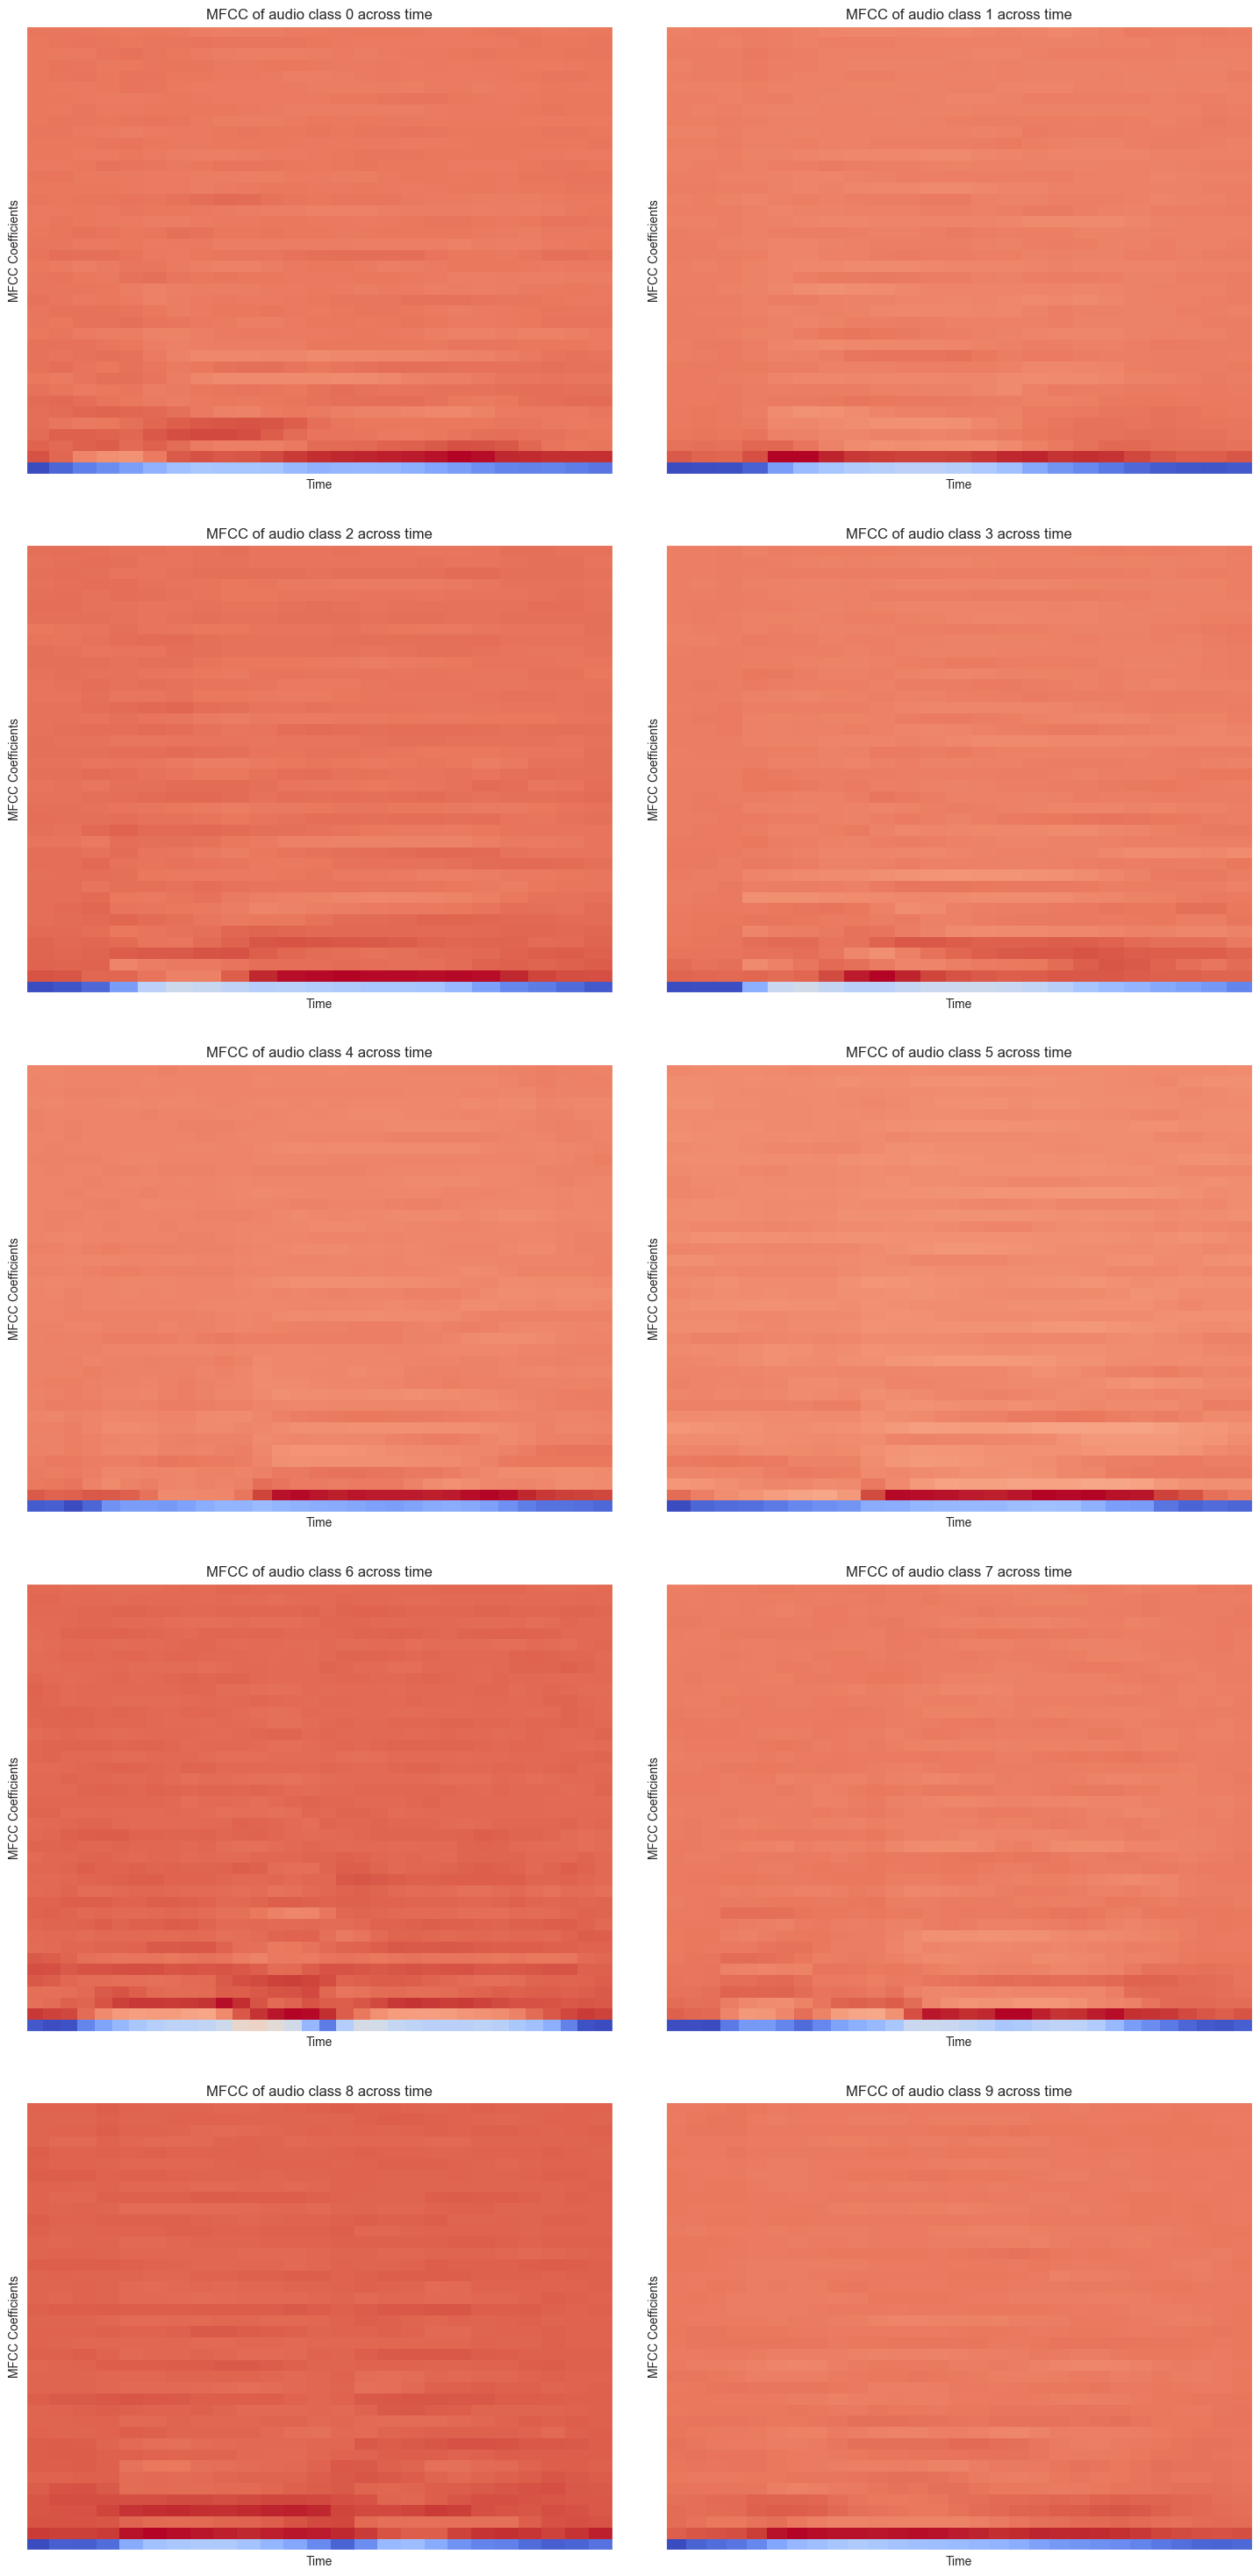

In [20]:
# Create subplots for spectrograms.
fig, ax = plt.subplots(5, 2, figsize = (15, 30))
# Initialize row and column variables for subplots.
row = 0
column = 0
# Iterate each single-digit.
for digit in range(10):
    # Get the audio of different classes (0-9).
    audio_data, sample_rate = get_audio_raw(digit)
    # Extract their MFCC.
    mfcc = extract_features_using_data(audio_data, sample_rate)
    # Print the shape of MFCC audio digit.
    print(f"Shape of MFCC of audio digit {digit} ---> ", mfcc.shape)
    # Display the plots and the title.
    ax[row,column].set_title(f"MFCC of audio class {digit} across time")
    # Display the MFCCs on the given subplot axis using librosa's visualization utility.
    librosa.display.specshow(mfcc, sr = 22050, ax = ax[row, column])
    # Set X-labels and Y-labels.
    ax[row,column].set_xlabel("Time")
    ax[row,column].set_ylabel("MFCC Coefficients")
    # Move on to the next row.
    if column == 1:
        column = 0
        row += 1
    # Move on to the next column in the same row.
    else:
        column+=1
        
# Adjust subplot spacing to prevent overlap.
plt.tight_layout(pad = 3)
# Display all the spectrograms.
plt.show()

**🔬 Observations:** 

- There are a lot of deviations from the spectrograms of one audio to another. There are a lot of tiny rectangles and bars whose positions are unique to each audio.
- Artificial Neural Network should be able to perform decently in identifying these audios.

### **v. Train-Test-Split**

In [21]:
# Get a list of features.
X = np.array(df['features'].to_list())
# Get a list of classes.
Y = np.array(df['class'].to_list())
# Create train set and test set.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, shuffle = True, random_state = 8)

In [22]:
# Checking the shape of the data
X_train.shape

(3750, 40)

## **III. Modelling**

### **i. Model Creation**

In [23]:
# Crete a Sequential object.
model = Sequential()
# Add first layer with 100 neurons to the sequental object.
model.add(Dense(100, input_shape = (40, ), activation = 'relu'))
# Add second layer with 100 neurons to the sequental object.
model.add(Dense(100, activation = 'relu'))
# Add third layer with 100 neurons to the sequental object.
model.add(Dense(100, activation = 'relu'))
# Add output layer with 10 neurons as it has 10 classes.
model.add(Dense(10, activation = 'softmax'))

/opt/anaconda3/envs/tf311/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# Print summary of the model.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,310 (98.87 KB)

 Trainable params: 25,310 (98.87 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Compile the model.
model.compile(loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = 'adam')

### **ii. Model Checkpoint & Training**

In [26]:
# Set the number of epochs for training.
num_epochs = 100
# Set the batch size for training.
batch_size = 32
# Fit the model.
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = num_epochs, batch_size = batch_size, verbose = 1)

Epoch 1/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4515 - loss: 4.3035 - val_accuracy: 0.7408 - val_loss: 0.7194
Epoch 2/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8141 - loss: 0.5414 - val_accuracy: 0.7600 - val_loss: 0.8375
Epoch 3/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8701 - loss: 0.3824 - val_accuracy: 0.8200 - val_loss: 0.5008
Epoch 4/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8933 - loss: 0.3096 - val_accuracy: 0.9360 - val_loss: 0.2171
Epoch 5/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9349 - loss: 0.1863 - val_accuracy: 0.9008 - val_loss: 0.2562
Epoch 6/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9523 - loss: 0.1516 - val_accuracy: 0.9016 - val_loss: 0.2551
Epoch 7/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9525 - loss: 0.1382 - val_accuracy: 0.9648 - val_loss: 0.0998
Epoch 8/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9488 - loss: 0.1451 - val_accu

### **iii. Model Evaluation**

In [27]:
# Make predictions on the test set.
Y_pred = model.predict(X_test)
# Convert each prediction vector into a single class label.
Y_pred = [np.argmax(i) for i in Y_pred]

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


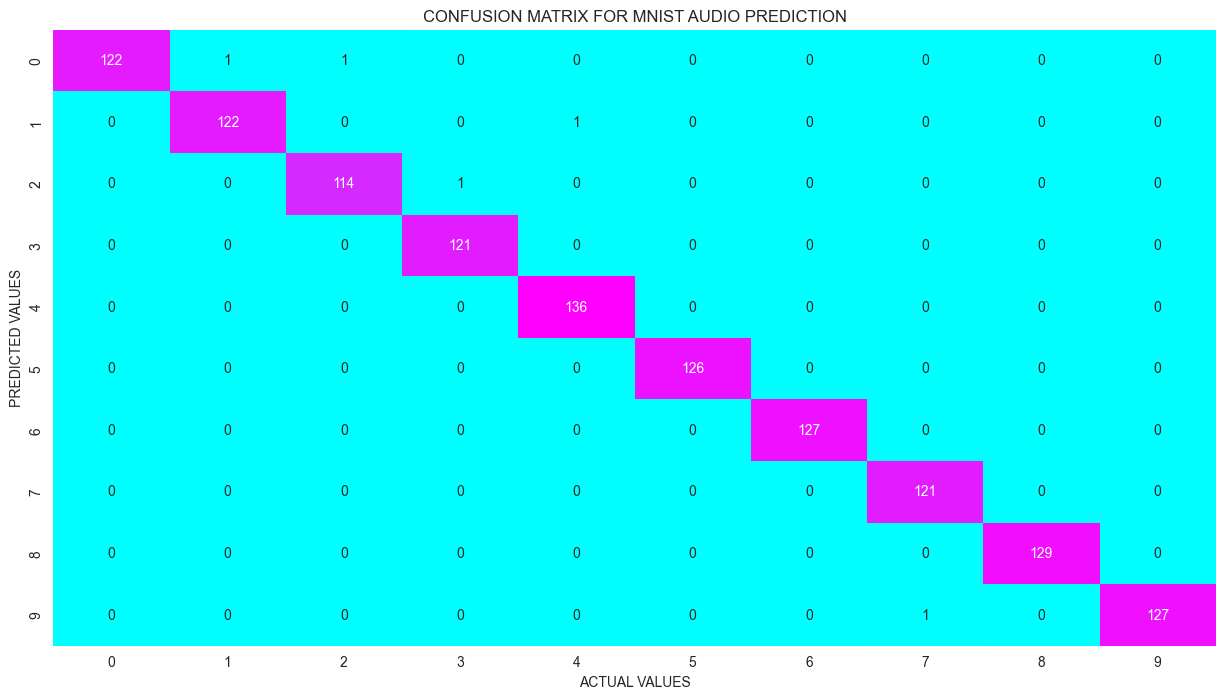

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.99      0.99      0.99       123
           2       0.99      0.99      0.99       115
           3       0.99      1.00      1.00       121
           4       0.99      1.00      1.00       136
           5       1.00      1.00      1.00       126
           6       1.00      1.00      1.00       127
           7       0.99      1.00      1.00       121
           8       1.00      1.00      1.00       129
           9       1.00      0.99      1.00       128

    accuracy                           1.00      1250
   macro avg       1.00      1.00      1.00      1250
weighted avg       1.00      1.00      1.00      1250



In [28]:
# Set style as dark.
sns.set_style("dark")
# Set figure size.
plt.figure(figsize = (15, 8))
# Set the plot title.
plt.title("CONFUSION MATRIX FOR MNIST AUDIO PREDICTION")
# Get confusion matrix
cm = confusion_matrix([int(x) for x in Y_test], Y_pred)
# Plot the confusion matrix as heatmap.
sns.heatmap(cm, annot = True, cmap = "cool", fmt = 'g', cbar = False)
# Set X-label and Y-label.
plt.xlabel("ACTUAL VALUES")
plt.ylabel("PREDICTED VALUES")
# Show the plot.
plt.show()
# Print the metrics.
print(classification_report(Y_test, Y_pred))

**🔬 Observations:**

- From the confusion matrix, we can observe that most of the observations are correctly identified by the model. 
- In very few cases, the model is not able to identify the correct digit. For example, 9 observations are 0 but the model has predicted them as 2. 
- The model has given a great performance with 99% recall, precision and F1-score. 

## **IV. Conclusion**

In this project, we successfully developed an artificial neural network (ANN) model for classifying audio samples into 10 distinct classes. The model was trained and evaluated on a well-prepared dataset, with careful preprocessing, feature extraction, and label encoding.

The evaluation metrics indicate **excellent model performance**:

- Overall accuracy reached **100%** on the test set.
- Precision, recall, and F1-scores were consistently above **0.98** across all classes, showing that the model is both highly precise and sensitive.
- No significant class imbalance or misclassification was observed, as confirmed by the support counts and per-class metrics.

These results demonstrate that the model can reliably predict the correct class from audio features, making it suitable for applications such as audio digit recognition, voice command classification, or similar tasks.

For future work, the model could be further tested on **noisy or real-world audio data** to ensure robustness, and techniques like data augmentation or regularization could be applied to improve generalization. Overall, the project confirms that a relatively simple ANN architecture, combined with effective preprocessing, can achieve near-perfect performance for this classification task.
